In [3]:
import pandas as pd
dataset=pd.read_csv('AAPL_data.csv').values
open_value=dataset[:,1]
print(open_value[:5])

open_value=open_value.reshape(-1,1)
print(open_value[:5])

print(open_value.shape)

[67.7142 68.0714 68.5014 66.7442 66.3599]
[[67.7142]
 [68.0714]
 [68.5014]
 [66.7442]
 [66.3599]]
(1259, 1)


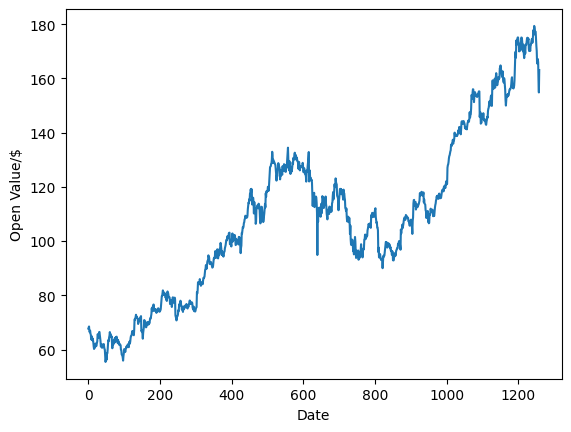

In [5]:
from matplotlib import pyplot as plt

plt.plot(open_value)
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaler_open_value=scaler.fit_transform(open_value)

print(open_value[:5])
print(scaler_open_value[:5])

#  scaler_open_value = (x-xmin)/(xmax-xmin)

[[67.7142]
 [68.0714]
 [68.5014]
 [66.7442]
 [66.3599]]
[[0.09915624]
 [0.10203815]
 [0.10550741]
 [0.09133024]
 [0.08822969]]


In [15]:
data=[]
target=[]

for i in range (50,open_value.shape[0]):
    data.append(scaler_open_value[i-50:i])
    target.append(scaler_open_value[i])
    
# 50 50 leyers data walta apend karpu eka kalla thiyenne
# data= 0-50,1-51,2,52
# target=51,52

In [17]:
import numpy as np

data_np=np.array(data)
target_np=np.array(target)

print(data_np.shape)
print(target_np.shape)

(1209, 50, 1)
(1209, 1)


In [19]:
np.save('data1',data)
np.save('target1',target)

In [21]:
import numpy as np

data = np.load('data1.npy')
target=np.load('target1.npy')

In [35]:
train_data=data[:1000]
train_target=target[:1000]

test_data=data[1000:]
test_target=target[1000:]

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(1000, 50, 1)
(209, 50, 1)
(1000, 1)
(209, 1)


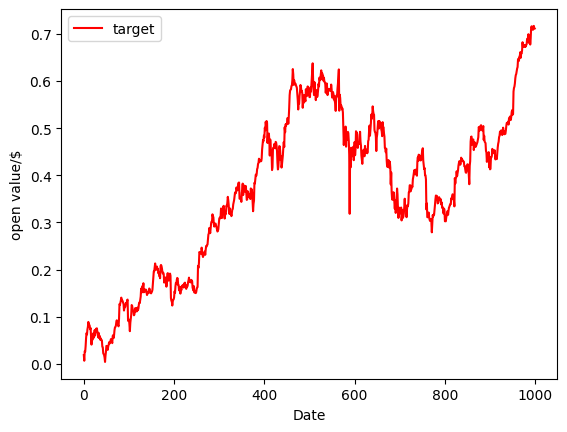

In [37]:
from matplotlib import pyplot as plt

plt.plot(train_target,'r',label='target')
plt.legend()
plt.xlabel('Date')
plt.ylabel('open value/$')
plt.show()

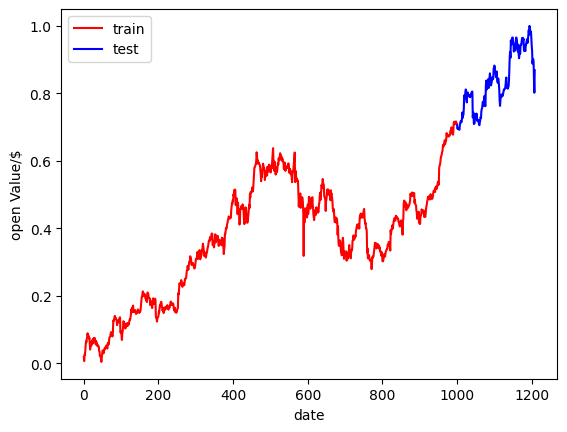

In [39]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1000,1209,1)

# 1000-1208 athara values select karala aragena thiyenne
plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.legend()
plt.xlabel('date')
plt.ylabel('open Value/$')
plt.show()

In [49]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(50,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

C:\Users\hp\.codegeex\mamba\envs\codegeex-agent\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
history=model.fit(train_data,train_target,epochs=50,validation_data=(test_data,test_target))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - loss: 0.0232 - val_loss: 0.0156
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 0.0033 - val_loss: 0.0073
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0020 - val_loss: 0.0088
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0019 - val_loss: 0.0068
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/ste

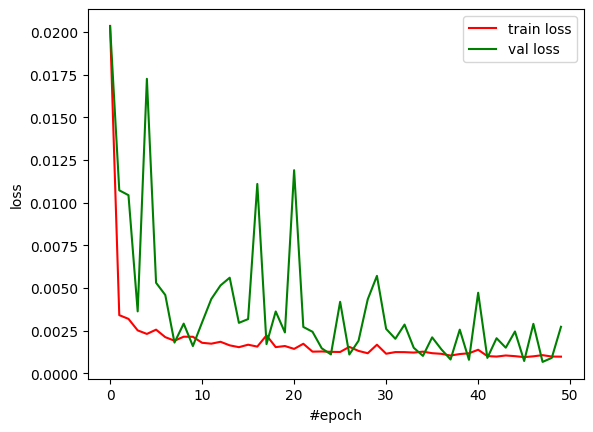

In [45]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('#epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [53]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score',r2)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step
r2 score 0.8612457326152732


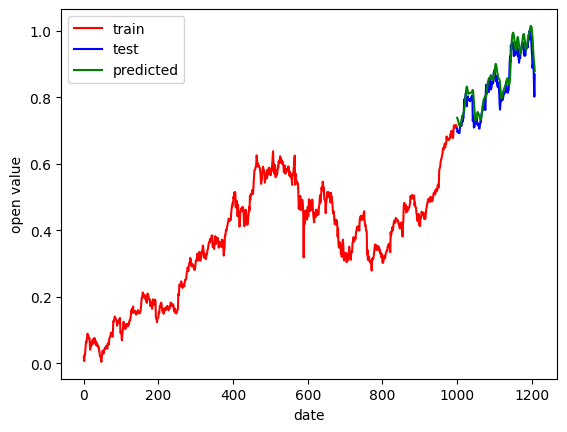

In [61]:
test_x_range=np.arange(1000,1209,1)

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')
# mekedi wenne test x range eke value ekata adala wa test target eka ekathu wena eka nathi unot eka muatama adda wennawa -0 wala idan thmai patangannne


plt.xlabel('date')
plt.ylabel('open value')
plt.legend()
plt.show()

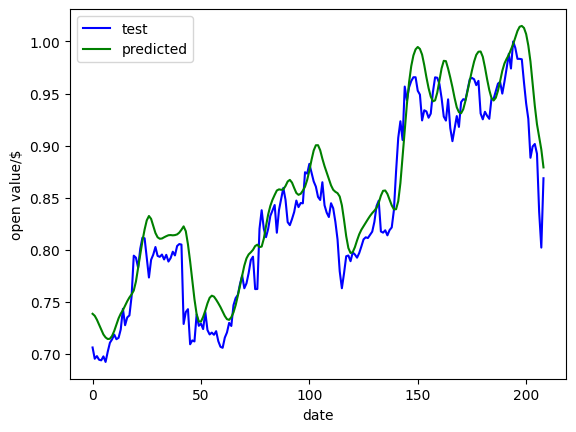

In [63]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'g',label='predicted')

plt.xlabel('date')
plt.ylabel('open value/$')
plt.legend()
plt.show()